# CZ1104 Linear Algebra for Computing - Lab 2

## Name: Chai Wen Xuan

## Mat Number: U2020350F

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import string


# Exercise 1: Computer Graphics – Linear Transformations

In [2]:

def plot(A,TM):


    color_lut = 'rgbc' #4 colors to represent 4 points

    fig = plt.figure()
    ax = plt.gca()
    xs = []
    ys = []

    for row in A:
        output_row = TM @ row
        x, y, i = output_row
        xs.append(x)
        ys.append(y)
        i = int(i) # convert float to int for indexing
        c = color_lut[i]
        plt.scatter(x, y, color=c)
        plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
    xs.append(xs[0])
    ys.append(ys[0])
    plt.plot(xs, ys, color="gray", linestyle='dotted')
    ax.set_xticks(np.arange(-2.5, 3, 0.5))
    ax.set_yticks(np.arange(-2.5, 3, 0.5))
    plt.grid()
    plt.show()

## Q1


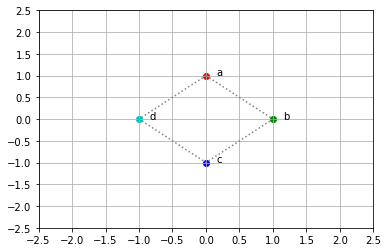

In [3]:
# points a, b and, c
a, b, c, d = (0, 1, 0), (1, 0, 1), (0, -1, 2), (-1, 0, 3)

# matrix with row vectors of points
A = np.array([a, b, c, d])
# 3x3 Identity transformation matrix
I = np.eye(3) #float

plot(A,I)

## Q2

### i)

In [4]:
Scale=[(2,0,0),(0,2,0),(0,0,1)]

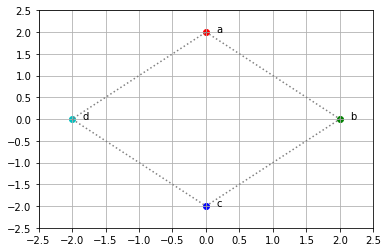

In [5]:
plot(A,Scale)

### ii)

In [6]:
Rotate=[(math.cos(math.pi/2),math.sin(math.pi/2),0),(-(math.sin(math.pi/2)),math.cos(math.pi/2),0),(0,0,1)]

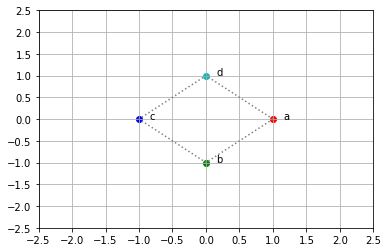

In [7]:
plot(A,Rotate)

### iii)

In [8]:
#Translation
Tran=[(1,0,0.5),(0,1,0.5),(0,0,1)]

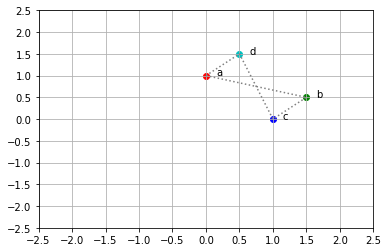

In [9]:
plot(A,Tran)

In [10]:
#Horizontal Shear
Hor=[(1,2,0),(0,1,0),(0,0,1)]

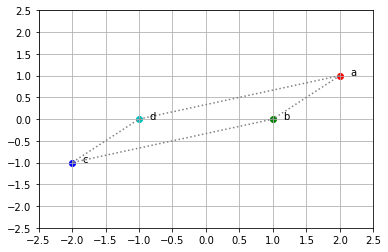

In [11]:
plot(A,Hor)

In [12]:
#Vertical Shear
Ver=[(1,0,0),(2,1,0),(0,0,1)]

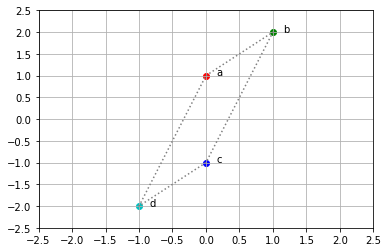

In [13]:
plot(A,Ver)

## Q3

In [14]:
Scale=[(3,0,0),(0,3,0),(0,0,1)]
Rotate=[(math.cos(math.pi),math.sin(math.pi),0),(-(math.sin(math.pi)),math.cos(math.pi),0),(0,0,1)]

combi= np.dot(Rotate,Scale)

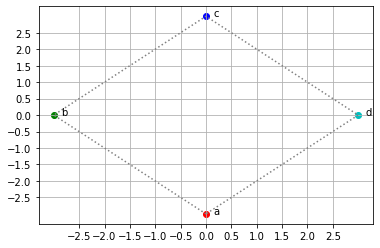

In [15]:
plot(A,combi)

# Exercise 2: Web Search – PageRank (not quite, but almost)

### Q4

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt
import string
import pandas as pd

# Function to transform a matrix to reduced row echelon form
def rref(A):
    tol = 1e-16
#     A = B.copy()
    rows, cols = A.shape
    r = 0
    pivots_pos = []
    row_exchanges = np.arange(rows)
    for c in range(cols):
        ## Find the pivot row:
        pivot = np.argmax (np.abs (A[r:rows,c])) + r
        m = np.abs(A[pivot, c])
        if m <= tol:
        ## Skip column c, making sure the approximately zero terms are
        ## actually zero.
            A[r:rows, c] = np.zeros(rows-r)
        else:
            ## keep track of bound variables
            pivots_pos.append((r,c))

            if pivot != r:
                ## Swap current row and pivot row
                A[[pivot, r], c:cols] = A[[r, pivot], c:cols]
                row_exchanges[[pivot,r]] = row_exchanges[[r,pivot]]

            ## Normalize pivot row
            A[r, c:cols] = A[r, c:cols] / A[r, c];

            ## Eliminate the current column
            v = A[r, c:cols]
            ## Above (before row r):
            if r > 0:
                ridx_above = np.arange(r)
                A[ridx_above, c:cols] = A[ridx_above, c:cols] - np.outer(v, A[ridx_above, c]).T
                ## Below (after row r):
            if r < rows-1:
                ridx_below = np.arange(r+1,rows)
                A[ridx_below, c:cols] = A[ridx_below, c:cols] - np.outer(v, A[ridx_below, c]).T
                r += 1
        ## Check if done
        if r == rows:
            break;
    return A


In [17]:
L = np.array([(0,1/3,1/3,1/2),
              (1/2,0,1/3,0),
              (1/2,1/3,0,1/2),
              (0,1/3,1/3,0)])

I = np.eye(4)

LI =3*(L-I)

#Augmented Matrix
ze = np.zeros((4,1))
Aug = np.append(LI,ze,axis=1)

In [18]:
Aug

array([[-3. ,  1. ,  1. ,  1.5,  0. ],
       [ 1.5, -3. ,  1. ,  0. ,  0. ],
       [ 1.5,  1. , -3. ,  1.5,  0. ],
       [ 0. ,  1. ,  1. , -3. ,  0. ]])

In [19]:
rref(Aug)
ra = Aug[0][3]
rb = Aug[1][3]
rc = Aug[2][3]

In [20]:
print(Aug)
print("rA: ",-ra,"rD")
print("rB: ",-rb,"rD")
print("rC: ",-rc,"rD")
print("rD is a free variable.")

[[ 1.      0.      0.     -1.5    -0.    ]
 [ 0.      1.      0.     -1.3125 -0.    ]
 [ 0.      0.      1.     -1.6875 -0.    ]
 [ 0.      0.      0.      0.      0.    ]]
rA:  1.5 rD
rB:  1.3125 rD
rC:  1.6875 rD
rD is a free variable.


In [21]:
print("4a: Yes")
print("4b: Yes")
print("4c: No, rD is a free variable, ther will be infinite number of solution.")

4a: Yes
4b: Yes
4c: No, rD is a free variable, ther will be infinite number of solution.


In [22]:
L=np.array([[0,1/2,1/4,1,1/3],
    [1/3,0,1/4,0,0],
    [1/3,1/2,0,0,1/3],
    [1/3,0,1/4,0,1/3],
    [0,0,1/4,0,0]])


I = np.eye(5)

LI = 12*(L-I)

#Augmented Matrix
ze = np.zeros((5,1))
Aug = np.append(LI,ze,axis=1)

In [23]:
rref(Aug)
xa = Aug[0][4]
xb = Aug[1][4]
xc = Aug[2][4]
xd = Aug[3][4]
print(Aug)
print("xA: ",-xa,"rE")
print("xB: ",-xb,"rE")
print("xC: ",-xc,"rE")
print("xD: ",-xd,"rE")
print("xE is a free variable.")

[[ 1.          0.          0.          0.         -6.33333333 -0.        ]
 [ 0.          1.          0.          0.         -3.11111111 -0.        ]
 [ 0.          0.          1.          0.         -4.         -0.        ]
 [ 0.          0.          0.          1.         -3.44444444 -0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]
xA:  6.333333333333334 rE
xB:  3.1111111111111116 rE
xC:  4.0 rE
xD:  3.4444444444444446 rE
xE is a free variable.


# Exercise 3: Epidemic Dynamics – SIR model


## Q6

In [24]:
𝐱0 = np.array([0.75, 0.1, 0.1, 0.05])
P = np.array([(0.95, 0.04, 0, 0), 
              (0.05, 0.85, 0, 0),
              (0, 0.1, 1, 0),
              (0, 0.01, 0, 1)])

x1 = np.dot(x0, P)

In [25]:
print(P)
print("State: ",x1)

[[0.95 0.04 0.   0.  ]
 [0.05 0.85 0.   0.  ]
 [0.   0.1  1.   0.  ]
 [0.   0.01 0.   1.  ]]
State:  [0.7175 0.1255 0.1    0.05  ]


## Q7


            S         I         R         D    t
0    1.000000  0.000000  0.000000  0.000000    1
1    0.950000  0.050000  0.000000  0.000000    2
2    0.904500  0.090000  0.005000  0.000500    3
3    0.862875  0.121725  0.014000  0.001400    4
4    0.824600  0.146610  0.026173  0.002617    5
..        ...       ...       ...       ...  ...
195  0.001277  0.000545  0.907434  0.090743  196
196  0.001235  0.000527  0.907489  0.090749  197
197  0.001194  0.000510  0.907541  0.090754  198
198  0.001155  0.000493  0.907592  0.090759  199
199  0.001117  0.000477  0.907642  0.090764  200

[200 rows x 5 columns]


<AxesSubplot:xlabel='t'>

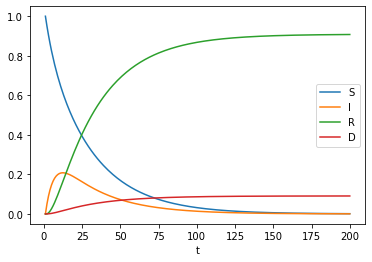

In [26]:
x_1 = np.array([1, 0, 0, 0])
x_progression = [x_1.flatten()] 
x_recent = x_1
for t in range(2,201):
    x_t = np.dot(P, x_recent) 
    x_progression.append(x_t.flatten()) 
    x_recent = x_t
df = pd.DataFrame(x_progression, columns=['S', 'I', 'R', 'D']) 
df['t'] = [t for t in range(1,201)]
print(df)
df.plot(x='t', y=['S','I','R','D'])